## **Circular dendrogram**

Loading required package: ggplot2


Attaching package: 'igraph'


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union


-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

<U+221A> tibble  2.1.3     <U+221A> dplyr   0.8.3
<U+221A> tidyr   1.0.0     <U+221A> stringr 1.4.0
<U+221A> readr   1.3.1     <U+221A> forcats 0.4.0
<U+221A> purrr   0.3.3     

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::as_data_frame() masks tibble::as_data_frame(), igraph::as_data_frame()
x purrr::compose()       masks igraph::compose()
x tidyr::crossing()      masks igraph::crossing()
x dplyr::filter()        masks stats::filter()
x dplyr::groups()        masks igraph::groups()
x dplyr::lag()           masks stats::lag()
x purrr::simplify()      masks igraph::simplify()



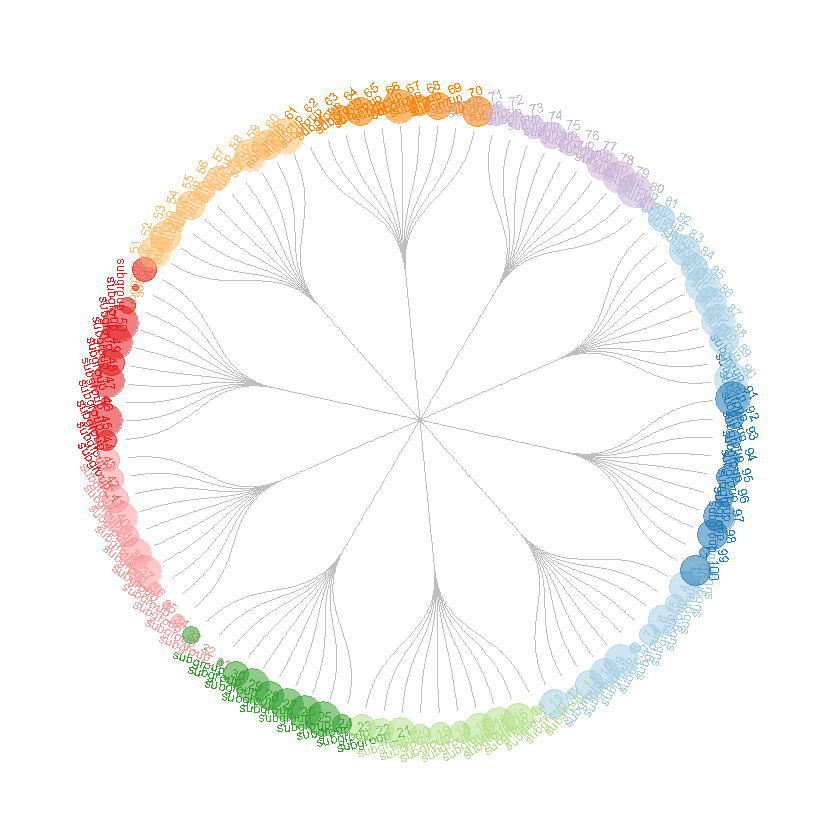

In [1]:
# Libraries
library(ggraph)
library(igraph)
library(tidyverse)
library(RColorBrewer) 
# create a data frame giving the hierarchical structure of your individuals
d1=data.frame(from="origin", to=paste("group", seq(1,10), sep=""))
d2=data.frame(from=rep(d1$to, each=10), to=paste("subgroup", seq(1,100), sep="_"))
edges=rbind(d1, d2)
 
# create a vertices data.frame. One line per object of our hierarchy
vertices = data.frame(
  name = unique(c(as.character(edges$from), as.character(edges$to))) , 
  value = runif(111)
) 
# Let's add a column with the group of each name. It will be useful later to color points
vertices$group = edges$from[ match( vertices$name, edges$to ) ]
#Let's add information concerning the label we are going to add: angle, horizontal adjustement and potential flip
#calculate the ANGLE of the labels
vertices$id=NA
myleaves=which(is.na( match(vertices$name, edges$from) ))
nleaves=length(myleaves)
vertices$id[ myleaves ] = seq(1:nleaves)
vertices$angle= 90 - 360 * vertices$id / nleaves
 
# calculate the alignment of labels: right or left
# If I am on the left part of the plot, my labels have currently an angle < -90
vertices$hjust<-ifelse( vertices$angle < -90, 1, 0)
 
# flip angle BY to make them readable
vertices$angle<-ifelse(vertices$angle < -90, vertices$angle+180, vertices$angle)
 
# Create a graph object
mygraph <- graph_from_data_frame( edges, vertices=vertices )
 
# Make the plot
ggraph(mygraph, layout = 'dendrogram', circular = TRUE) + 
  geom_edge_diagonal(colour="grey") +
  scale_edge_colour_distiller(palette = "RdPu") +
  geom_node_text(aes(x = x*1.15, y=y*1.15, filter = leaf, label=name, angle = angle, hjust=hjust, colour=group), size=2.7, alpha=1) +
  geom_node_point(aes(filter = leaf, x = x*1.07, y=y*1.07, colour=group, size=value, alpha=0.2)) +
  scale_colour_manual(values= rep( brewer.pal(9,"Paired") , 30)) +
  scale_size_continuous( range = c(0.1,10) ) +
  theme_void() +
  theme(
    legend.position="none",
    plot.margin=unit(c(0,0,0,0),"cm"),
  ) +
  expand_limits(x = c(-1.3, 1.3), y = c(-1.3, 1.3))